In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
#!ln -s "/content/drive/MyDrive/CVCS_Project_23/Datasets" "/content/Datasets"

Mounted at /content/drive/


In [ ]:
!nvidia-smi

Fri Apr 21 11:33:41 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Let's try to work on the "GroceryStoreDataset01" first, whose structure is very easy to understand



*   3 main folders:
  - train
  - test
  - val(validation)

*   Each of these has then 3 subfolders, for each product macrocategory:
  - fruit
  - vegetable
  - packages

*   Each of these has its own subcategories, like:
  - apple for fruit
  - tomato for vegetables
  - milk for packages


What we want ot achieve first is:
*    Deblurring(Gaussian or Average)
*    Edge detection(Sobel or Canny)
*    Line detection(Hough's Transform)

Here we're gonna test filtering results combining each of the above techniques.

## Gaussian +  Canny

TypeError: ignored

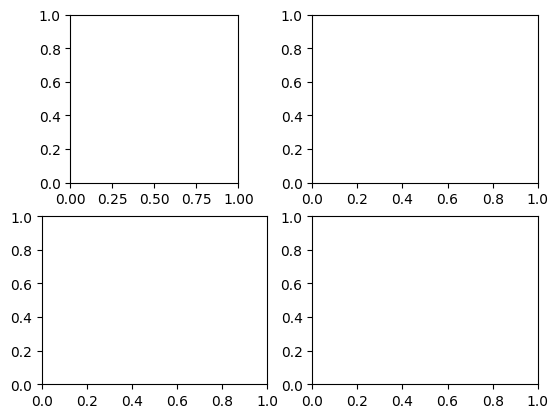

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow
%matplotlib inline

f = "/content/Datasets/GroceryStoreDataset01/train/Fruit/Lemon/Lemon_001.jpg"
# read image
img = cv.imread(f)
# convert to grayscale
fig, ax = plt.subplots(nrows=2, ncols=2)

# Display the image on the first subplot (row=0, col=0)
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

# Convert the image to grayscale 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Apply Gaussian blur to the grayscale image and display it on the third subplot (row=1, col=0)
blur = cv.GaussianBlur(gray, (5,5), 0)
ax[1, 0].imshow(blur, cmap='gray')
ax[1, 0].set_title('Gaussian Blur')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

# Apply Canny edge detection to the blurred grayscale image and display it on the fourth subplot (row=1, col=1)
canny = cv.Canny(blur, 100, 200)
# ret, thresh = cv.threshold(canny, 127, 255, cv.THRESH_BINARY)
# find contours
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# draw contours
# cv.drawContours(img, contours, -1, (0, 255, 0), 3)
ax[1, 1].imshow(canny, cmap='gray')
ax[1, 1].set_title('Canny Edges')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])


# detect lines with Hough transform
lines = cv.HoughLinesP(canny, 1, np.pi/180, 100, minLineLength=100, maxLineGap=30)
# draw lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
# show image

ax[0, 1].imshow(img, cmap='gray')
ax[0, 1].set_title('Hough')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
plt.show()

        

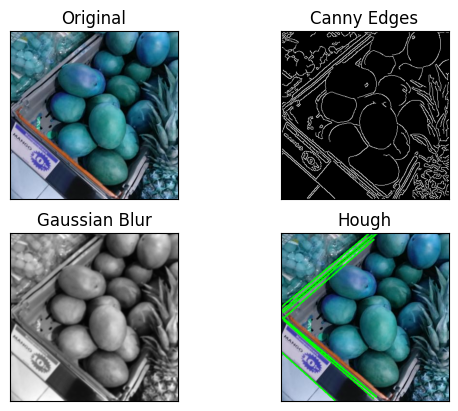

In [ ]:
f = "/content/drive/MyDrive/CVCS_Project_23/Datasets/GroceryStoreDataset01/train/Fruit/Mango/Mango_011.jpg"

# read image
img = cv.imread(f)
# convert to grayscale
fig, ax = plt.subplots(nrows=2, ncols=2)

# Display the image on the first subplot (row=0, col=0)
ax[0, 0].imshow(img)
ax[0, 0].set_title('Original')
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])

# Convert the image to grayscale 
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


# Apply Gaussian blur to the grayscale image and display it on the third subplot (row=1, col=0)
blur = cv.GaussianBlur(gray, (5,5), 0)
ax[1, 0].imshow(blur, cmap='gray')
ax[1, 0].set_title('Gaussian Blur')
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])

# Apply Canny edge detection to the blurred grayscale image and display it on the fourth subplot (row=1, col=1)
canny = cv.Canny(blur, 50, 150)
# ret, thresh = cv.threshold(canny, 127, 255, cv.THRESH_BINARY)
# find contours
# contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# draw contours
# cv.drawContours(img, contours, -1, (0, 255, 0), 3)
ax[0, 1].imshow(canny, cmap='gray')
ax[0, 1].set_title('Canny Edges')
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])


# detect lines with Hough transform
lines = cv.HoughLinesP(canny, 1, np.pi/180, 100, minLineLength=100, maxLineGap=40)
# draw lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
# show image

ax[1, 1].imshow(img, cmap='gray')
ax[1, 1].set_title('Hough')
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
plt.show()


## Filtering all the images
Let's try to filter and save each image of the "GroceryStoreDataset01"  using just median blur and Canny.

In [ ]:


import time

folder_path = "/content/drive/MyDrive/CVCS_Project_23/Datasets/GroceryStoreDataset01/train/"
output_folder_path = "/content/drive/MyDrive/CVCS_Project_23/Datasets/GroceryStoreDataset01/filtered/"
# Recreate the same subdirectory structure in the filtered folder
for root, dirs, files in os.walk(folder_path):
    for dir in dirs:
        input_subdir_path = os.path.join(root, dir)
        output_subdir_path = input_subdir_path.replace(folder_path, output_folder_path)
        if not os.path.exists(output_subdir_path):
            os.makedirs(output_subdir_path)
        # print(f"created subdir {output_subdir_path}!")

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".jpg"):
            # print(file)
            input_file_path = os.path.join(root, file)
            output_file_path = input_file_path.replace(folder_path, output_folder_path)
            img = cv.imread(input_file_path)
            # Filter the image here
            
            # turn the image into greyscale
            grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

            # apply gaussian blur
            blurred = cv.GaussianBlur(grey, (5, 5), 0)

            # aply canny filter for edge detection
            canny = cv.Canny(blurred, 50, 150)
            ret, thresh = cv.threshold(canny, 127, 255, cv.THRESH_BINARY)
            contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
            cv.drawContours(img, contours, -1, (0, 255, 0), 3)

            # save image
            cv.imwrite(output_file_path, img)


